# **Iris Species Datase**

#Loading Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#Exploring data

In [45]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [47]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Cleaning

In [50]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

#Data Traformation

In [52]:
le=LabelEncoder()
df['SpeciesType']=le.fit_transform(df['species'])

#EDA

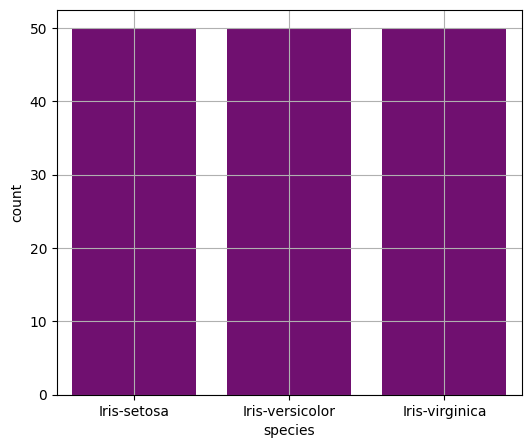

In [53]:
plt.figure(figsize=(6,5))
sns.countplot(x='species',data=df ,color='purple')
plt.grid()

<Figure size 500x400 with 0 Axes>

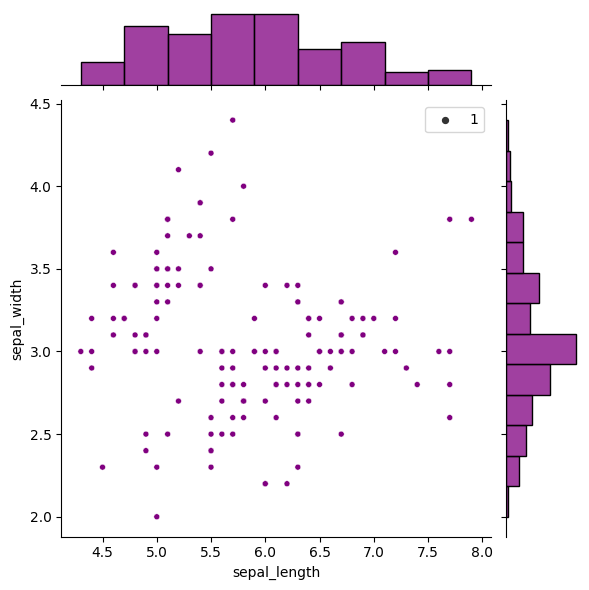

<Figure size 500x400 with 0 Axes>

In [54]:
v1= sns.jointplot(x="sepal_length", y="sepal_width", color='purple',data=df, size=1)
plt.figure(figsize=(5,4))

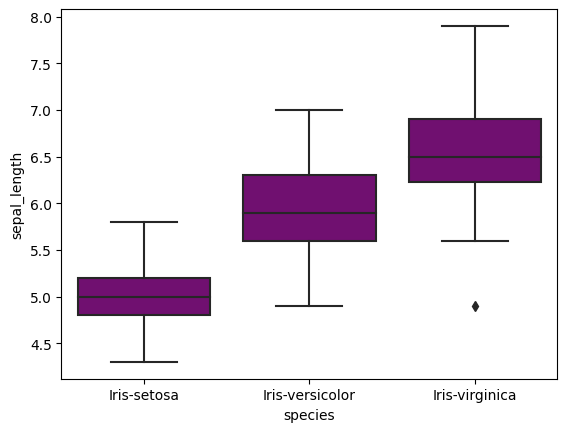

In [55]:
v2= sns.boxplot(data=df, x='species',y='sepal_length', color='purple')

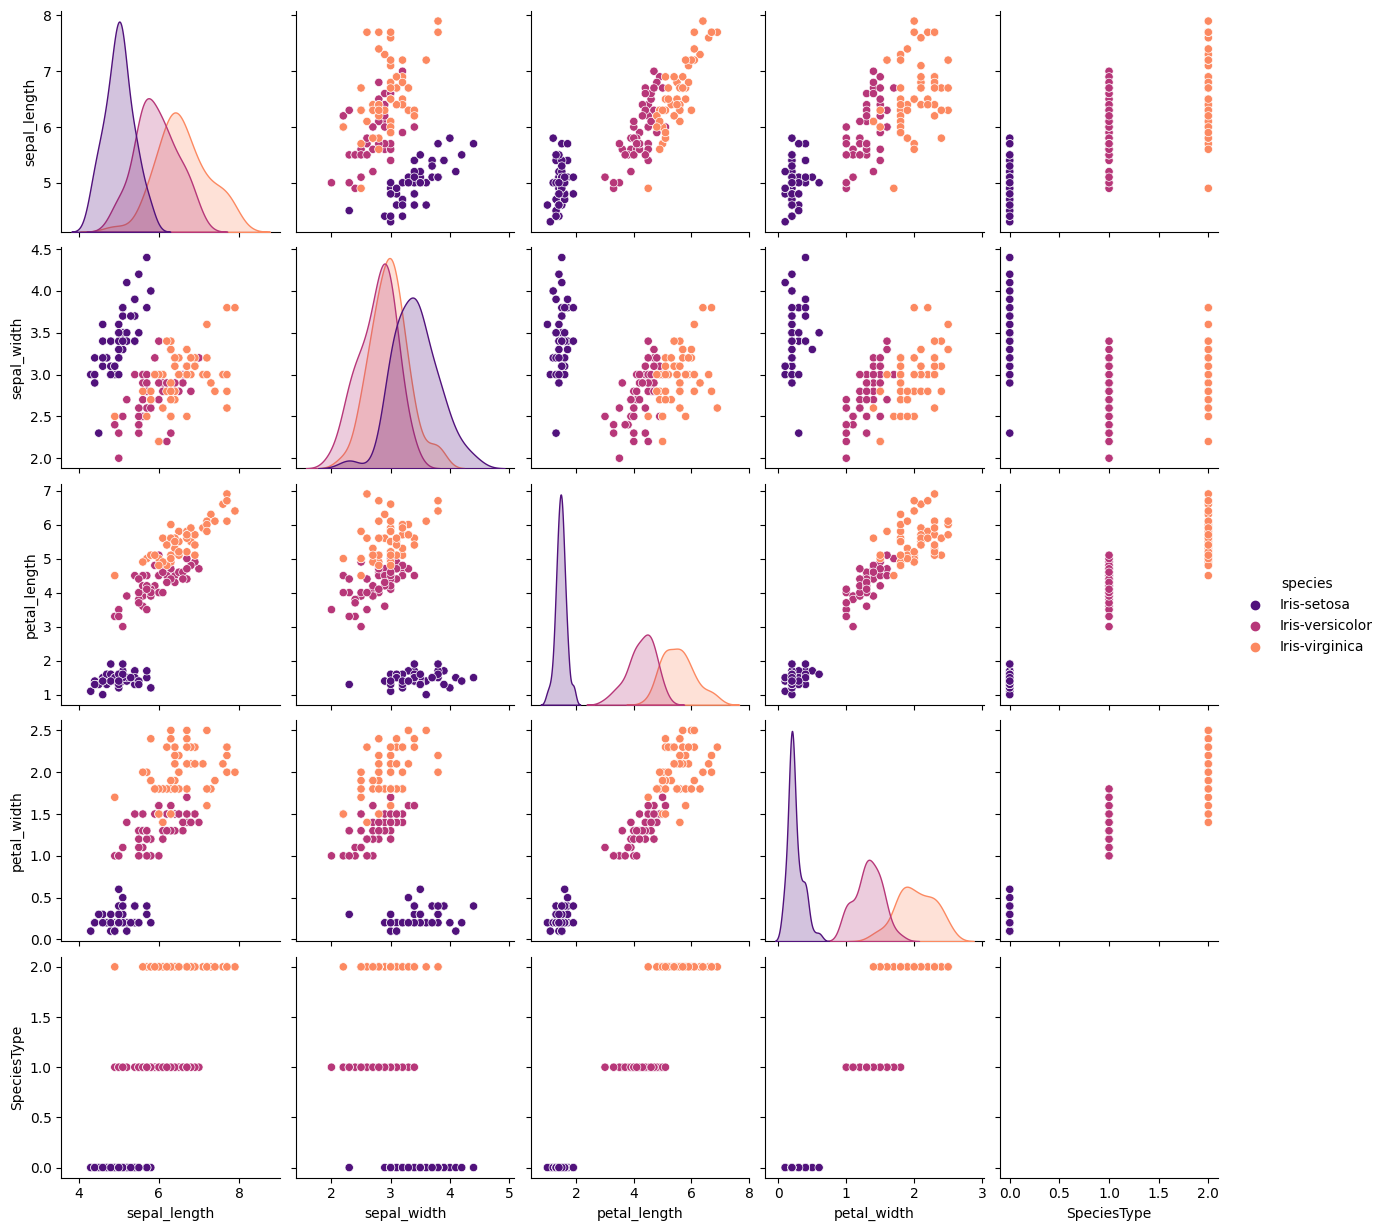

In [56]:
col= sns.color_palette("magma", n_colors=3)
sns.pairplot(df,hue='species',palette=col)
plt.show()

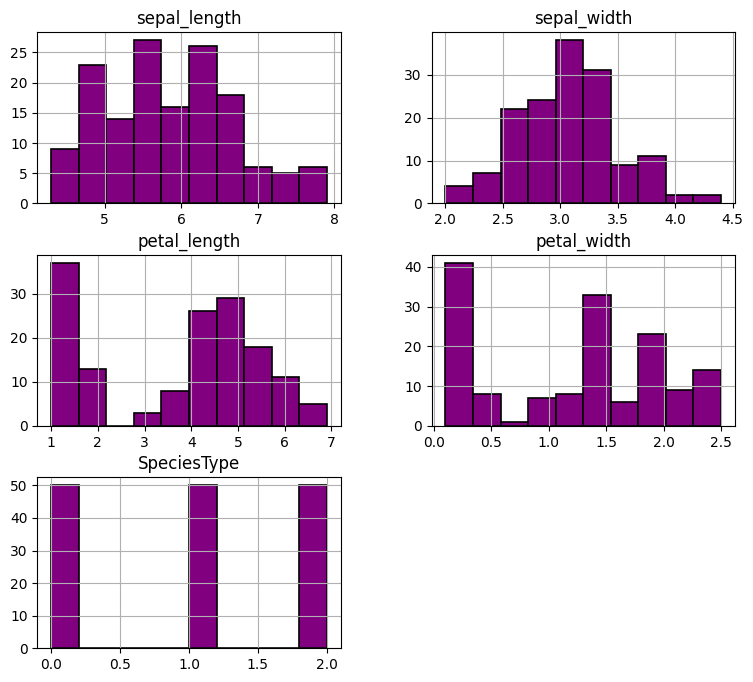

In [57]:
df.hist(edgecolor='black', linewidth=1.2, color='purple')
fig=plt.gcf()
fig.set_size_inches(9,8)
plt.show()

Text(0.5, 1.0, 'CorrelationPlot')

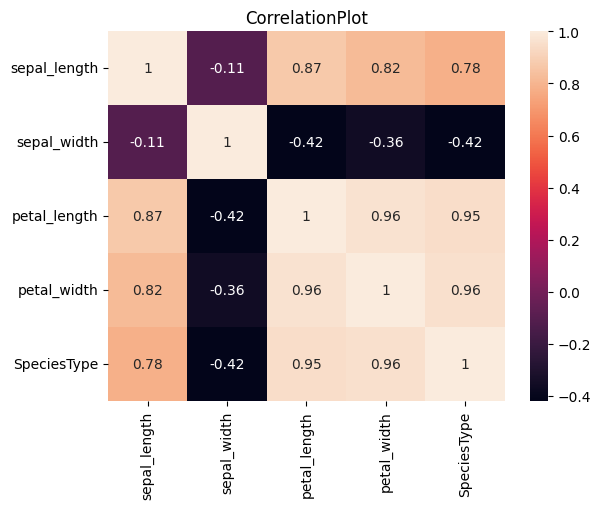

In [58]:
correlation_matrix = df.corr(numeric_only = True)
ax = sns.heatmap(correlation_matrix, annot = True)
ax.set_title('CorrelationPlot')

#Pre-Processing

In [59]:
data=df.copy()

In [60]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

#Model Building

In [61]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [62]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [63]:
# Predict
predictions = svn.predict(X_test)

In [64]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

In [65]:
X_new = np.array([[3, 2, 2, 0.2], [  2.0, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-virginica']
